<h1>What is Telecom Churn?</h1>
<hr>
<p>
Telecom churn refers to the phenomenon where customers switch from one telecommunications service provider to another, typically seeking better offers, improved services, or more competitive pricing. 
    
Churn rate is a key metric used by telecom companies to measure the percentage of customers who discontinue their services within a given period. Reducing churn is important for telecom providers to maintain customer loyalty and sustain their business.
</p>

<h2>EDA and Prediction</h2>
<hr>

<p>
    Churn stands out as a significant challenge in the telecom industry. Studies indicate that the monthly churn rate, on average, for the leading four wireless carriers in the US falls within the range of 1.9% to 2%.
</p>

In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # For creating plots
import matplotlib.ticker as mtick # For specifying the axes tick format 
import matplotlib.pyplot as plt

sns.set(style = 'white')

# Input data files are available in the given directory.

import os
print(os.listdir("/Users/ishahiteshbhaishekh/Downloads/datasets"))

# Any results you write to the current directory are saved as output.

['.DS_Store', 'Features data set.csv', 'Telecom-Customer-Churn.csv', 'sales data-set.csv', 'stores data-set.csv']


<h3>Read the data file</h3>

In [9]:
telecom_cust = pd.read_csv("/Users/ishahiteshbhaishekh/Downloads/datasets/Telecom-Customer-Churn.csv")

<h3>Display the top rows of a DataFrame</h3>

In [10]:
telecom_cust.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<h3>Retrieve the column names from a DataFrame "telecom_cust".</h3>

In [11]:
telecom_cust.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

<h3>Examine the data to identify and check the presence of any missing values.</h3>

In [15]:
# Check data types of all the columns
telecom_cust.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [16]:
# Converting Total Charges to a numerical data type.
telecom_cust.TotalCharges = pd.to_numeric(telecom_cust.TotalCharges, errors='coerce')
telecom_cust.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

<h4 style="line-height:1.3em;">After examining the output, it appears that there are 11 missing values for Total Charges. Let's proceed by eliminating these 11 rows from our dataset.</h4>

In [17]:
#Remove missing values 
telecom_cust.dropna(inplace = True)

#Remove customer IDs from the data set
df2 = telecom_cust.iloc[:,1:]

#Converting the predictor variable 'Churn' in a binary numeric variable
df2['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df2['Churn'].replace(to_replace='No',  value=0, inplace=True)



,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


<Axes: >

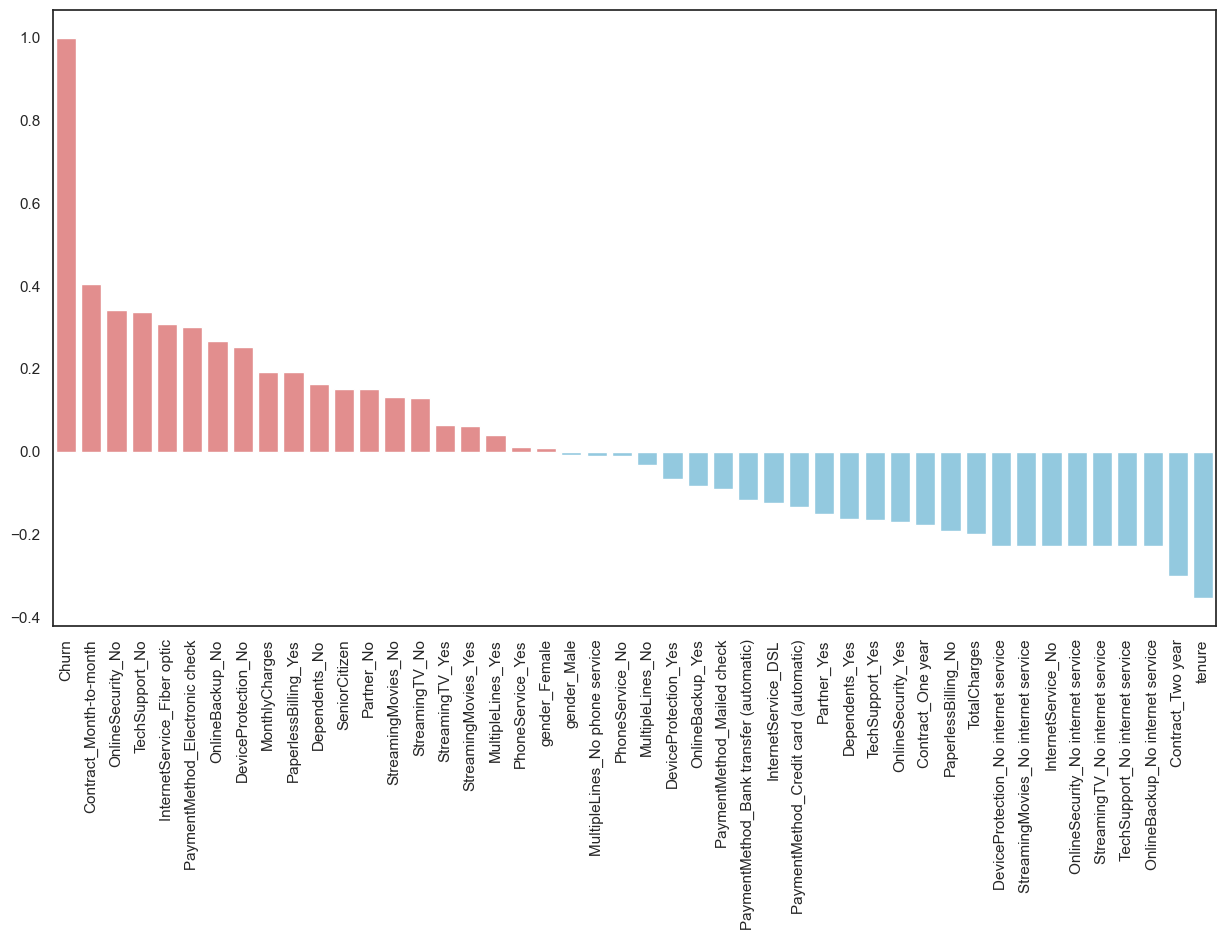

In [29]:
# Set up the plot size
plt.figure(figsize=(15, 8))

# Calculate and plot the correlation of each variable with 'Churn', sorted in descending order
df_dummies.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')

# Define colors for the bars based on positive and negative correlations
colors = ['skyblue' if c < 0 else 'lightcoral' for c in correlation]

# Create a bar plot using seaborn with specified colors
sns.barplot(x=correlation.index, y=correlation.values, palette=colors)

<h2>Identifying Correlations in Churn Factors:</h2>
<hr>
In our analysis, we observe positive correlations between churn and factors like month-to-month contracts, the absence of online security, and tech support. Conversely, negative correlations are found with variables such as tenure and two-year contracts.

Additionally, intriguing patterns emerge where services like online security, streaming TV, online backup, and tech support, when provided independently of an internet connection, exhibit negative associations with churn. 

To better understand these correlations, we will explore patterns before moving on to modeling and identifying crucial variables for effective churn prevention.

<h1>Data Exploration</h1>
<hr>
To commence our exploration, we will delve into the dataset to comprehend individual variable distributions and discern potential trends. Initially, we will examine demographic aspects, focusing on gender, age range, partner status, and dependent status of the customers.

**A. Demographics** 

**1. Gender Distribution:** The dataset reveals an approximately equal split between male and female customers, with each gender comprising about half of the total customers.

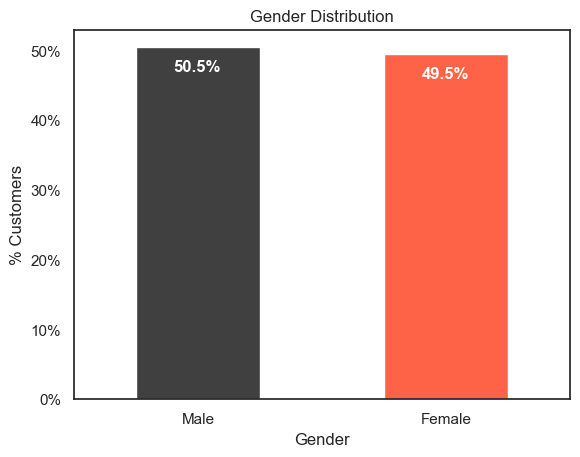

In [35]:
# Set the colors for the bar graph
colors = ['#404040', '#FF6347']

# Create a bar graph with gender distribution
ax = (telecom_cust['gender'].value_counts() * 100.0 / len(telecom_cust)).plot(kind='bar', stacked=True, rot=0, color=colors)

# Format the y-axis as a percentage
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Set labels for the y-axis and x-axis
ax.set_ylabel('% Customers')
ax.set_xlabel('Gender')
ax.set_ylabel('% Customers')

# Set the title of the plot
ax.set_title('Gender Distribution')

# Create a list to collect the plt.patches data
totals = []

# Find the values and append to the list
for i in ax.patches:
    totals.append(i.get_width())

# Set individual bar labels using the above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x() + 0.15, i.get_height() - 3.5, \
            str(round((i.get_height() / total), 1)) + '%',
            fontsize=12,
            color='white',
            weight='bold')

**2. Percentage of Senior Citizens:** Only 16% of our customers fall into the senior citizens category. This indicates that the majority of our customers in the dataset are younger individuals.

Text(0.5, 1.0, '% of Senior Citizens')

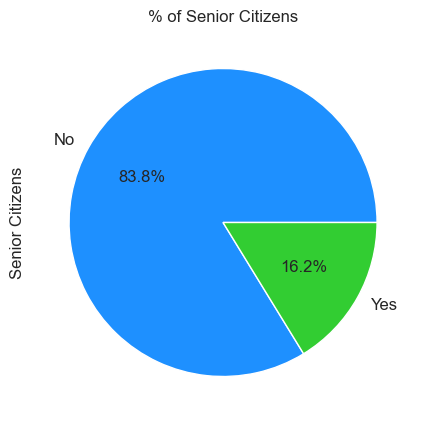

In [53]:
# Create a pie chart with a different color (e.g., 'c' for cyan)
ax = (telecom_cust['SeniorCitizen'].value_counts() * 100.0 / len(telecom_cust)) \
    .plot.pie(autopct='%.1f%%', labels=['No', 'Yes'], figsize=(5, 5), fontsize=12, colors=['dodgerblue', 'limegreen'])

# Format the y-axis labels as percentages
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Set the y-axis label
ax.set_ylabel('Senior Citizens', fontsize=12)

# Set the title for the pie chart
ax.set_title('% of Senior Citizens', fontsize=12)


**3. Partner and Dependent Status:**

Approximately half of the customers in the dataset are partnered, indicating a relatively even distribution. In contrast, only 30% of the total customers have dependents, suggesting a lower prevalence of customers with family obligations.

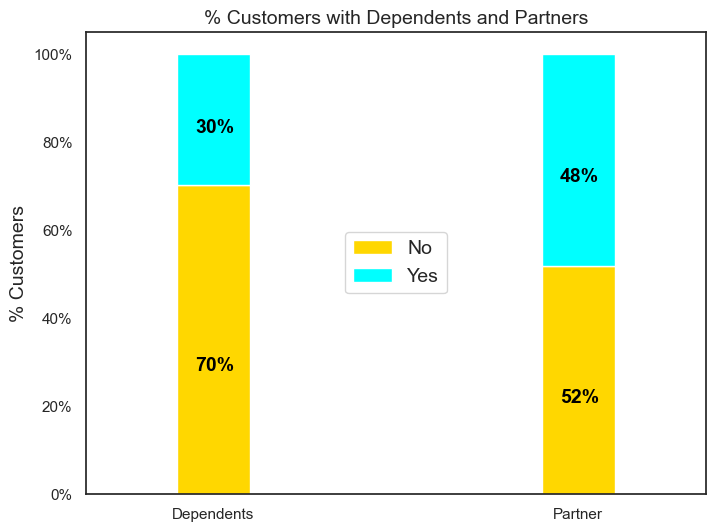

In [61]:
# Reshape the DataFrame for 'Dependents' and 'Partner' variables
df2 = pd.melt(telecom_cust, id_vars=['customerID'], value_vars=['Dependents', 'Partner'])

# Group the reshaped DataFrame by 'variable' and 'value' and count occurrences
df3 = df2.groupby(['variable', 'value']).count().unstack()

# Calculate percentages based on the total number of customers
df3 = df3 * 100 / len(telecom_cust)

# Choose custom colors for the bar plot
colors = ['#FFD700', '#00FFFF']  

# Create a stacked bar plot
ax = df3.loc[:, 'customerID'].plot.bar(stacked=True, color=colors, figsize=(8, 6), rot=0, width=0.2)

# Format y-axis labels as percentages
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Set labels and title for the plot
ax.set_ylabel('% Customers', size=14)
ax.set_xlabel('')
ax.set_title('% Customers with Dependents and Partners', size=14)

# Set legend properties
ax.legend(loc='center', prop={'size': 14})

# Annotate each bar with its percentage value
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.0f}%'.format(height), (p.get_x() + .25 * width, p.get_y() + .4 * height),
                color='black',
                weight='bold',
                size=14)


**Let's examine the percentage of customers with partners who also have dependents.** 

Surprisingly, only around half of the customers with partners also have dependents, while the other half does not. 

On the other hand, as anticipated, among customers without partners, the majority (70%) do not have any dependents.

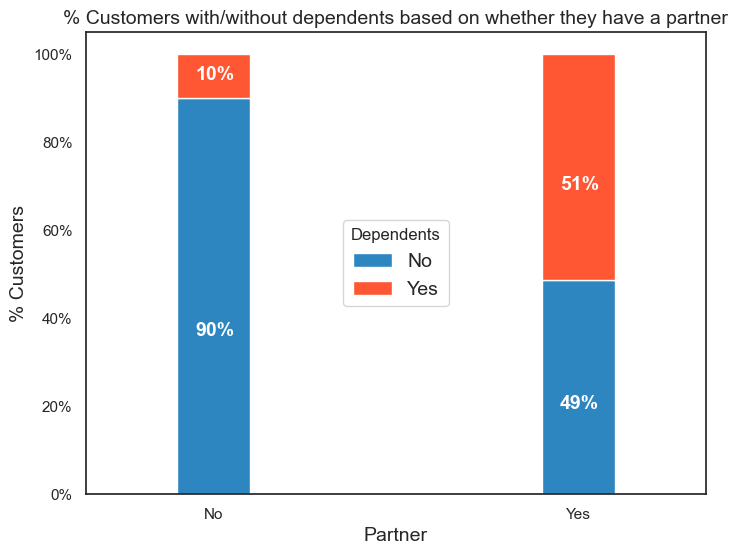

In [64]:
# Group data by 'Partner' and 'Dependents', and create a stacked bar plot
colors = ['#2E86C1', '#FF5733'] 
partner_dependents = telecom_cust.groupby(['Partner', 'Dependents']).size().unstack()

ax = (partner_dependents.T * 100.0 / partner_dependents.T.sum()).T.plot(kind='bar',
                                                                        width=0.2,
                                                                        stacked=True,
                                                                        rot=0,
                                                                        figsize=(8, 6),
                                                                        color=colors)

# Format y-axis labels as percentages
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Set legend properties
ax.legend(loc='center', prop={'size': 14}, title='Dependents', fontsize=14)

# Set labels and title for the plot
ax.set_ylabel('% Customers', size=14)
ax.set_title('% Customers with/without dependents based on whether they have a partner', size=14)
ax.xaxis.label.set_size(14)

# Code to add data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.0f}%'.format(height), (p.get_x() + .25 * width, p.get_y() + .4 * height),
                color='white',
                weight='bold',
                size=14)


Upon analysis, it was observed that there are no discernible differences in the distribution of customers with or without dependents and partners when considering gender. Furthermore, there is no variation in senior citizen status based on gender.

**B. Customer Account Information:** 

Now, let's examine the tenure and contract details.

**1. Tenure:**

The tenure analysis, as depicted in the histogram below, reveals a significant number of customers who have subscribed to the telecom services for only a month. 

Conversely, there is a notable presence of customers who have remained with the company for around 72 months. 

This variation might be attributed to the diversity in contract durations. 

It suggests that customer retention or departure could be influenced by the terms and conditions specified in their respective contracts.

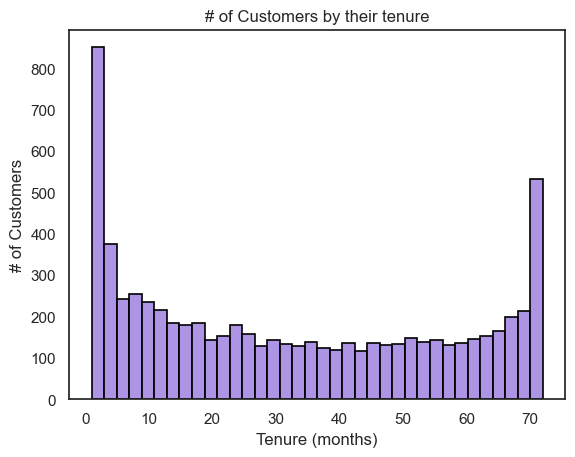

In [69]:
# Create a histogram using histplot
ax = sns.histplot(telecom_cust['tenure'], bins=int(180/5), color='mediumpurple', edgecolor='black', linewidth=1.2)

# Set labels and title
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('# of Customers by their tenure')

# Show the plot
plt.show()

**2. Contracts Analysis:** 

To interpret the aforementioned graph, let's begin by examining the distribution of customers across various contract types.

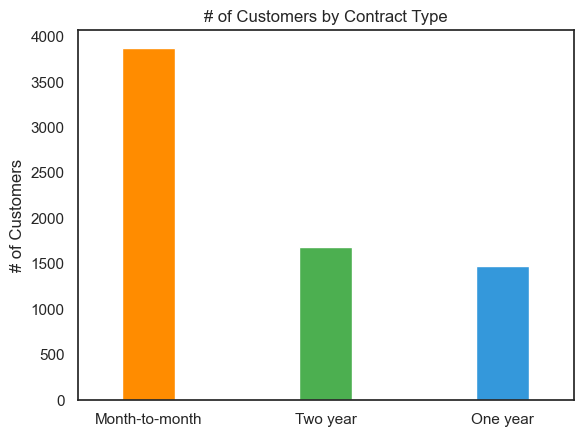

In [74]:
# Define colors for each category
colors = ['#FF8C00', '#4CAF50', '#3498db']  

# Create a bar plot with different colors for each category
ax = telecom_cust['Contract'].value_counts().plot(kind='bar', rot=0, width=0.3, color=colors)

# Set labels and title
ax.set_ylabel('# of Customers')
ax.set_title('# of Customers by Contract Type')

# Show the plot
plt.show()


As evident from the graph, a majority of customers opt for the month-to-month contract, whereas an equal number of customers are divided between the 1-year and 2-year contracts. 

Moving forward, we will analyze the tenure of customers in relation to their chosen contract type.

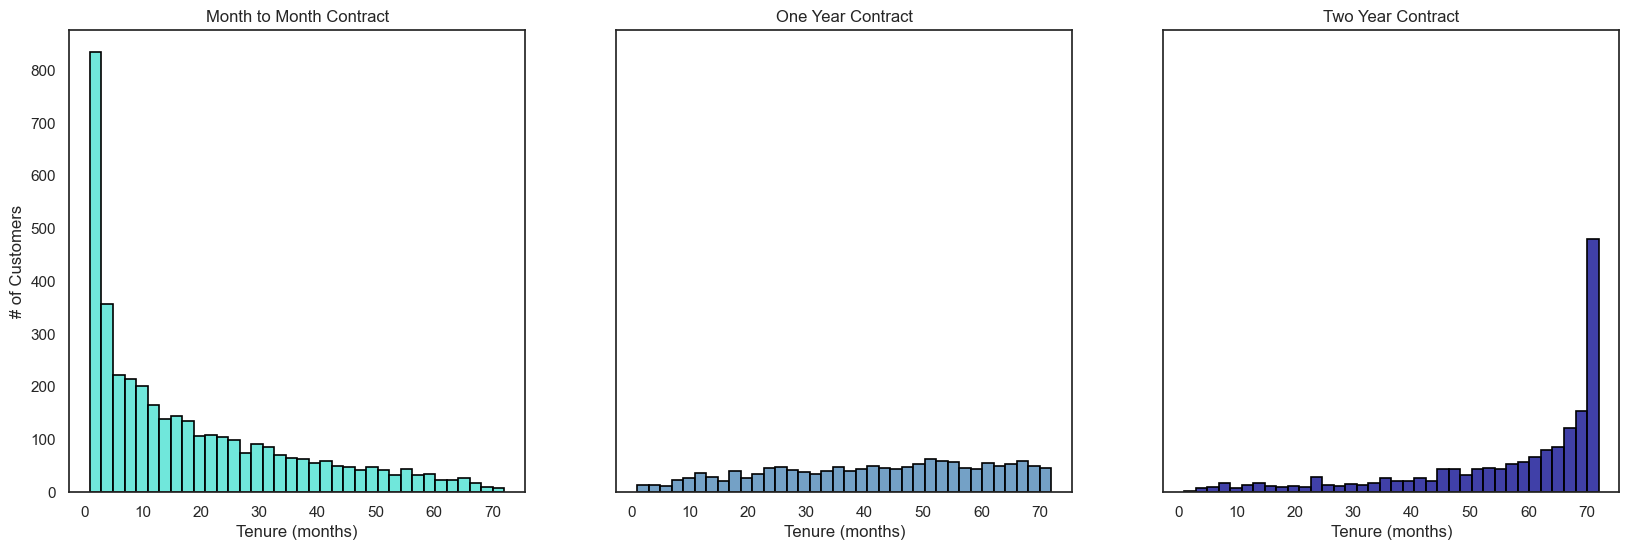

In [83]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(20, 6))

# Using histplot for each contract type
sns.histplot(telecom_cust[telecom_cust['Contract'] == 'Month-to-month']['tenure'],
             bins=int(180/5), color='turquoise', edgecolor='black', linewidth=1.2, ax=ax1)
ax1.set_ylabel('# of Customers')
ax1.set_xlabel('Tenure (months)')
ax1.set_title('Month to Month Contract')

sns.histplot(telecom_cust[telecom_cust['Contract'] == 'One year']['tenure'],
             bins=int(180/5), color='steelblue', edgecolor='black', linewidth=1.2, ax=ax2)
ax2.set_xlabel('Tenure (months)')
ax2.set_title('One Year Contract')

sns.histplot(telecom_cust[telecom_cust['Contract'] == 'Two year']['tenure'],
             bins=int(180/5), color='darkblue', edgecolor='black', linewidth=1.2, ax=ax3)
ax3.set_xlabel('Tenure (months)')
ax3.set_title('Two Year Contract')

plt.show()


The observation highlights a distinct pattern – shorter durations for monthly contracts and extended durations for 2-year contracts. 

This pattern implies a correlation between contract length and customer loyalty. 

The data suggests that customers committing to longer-term contracts exhibit greater loyalty, reinforcing the findings seen in the earlier analysis on the correlation with churn rate.

**C. Distribution of Various Services Used by Customers**

Now, let's examine how different services are distributed among customers.

In [84]:
telecom_cust.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

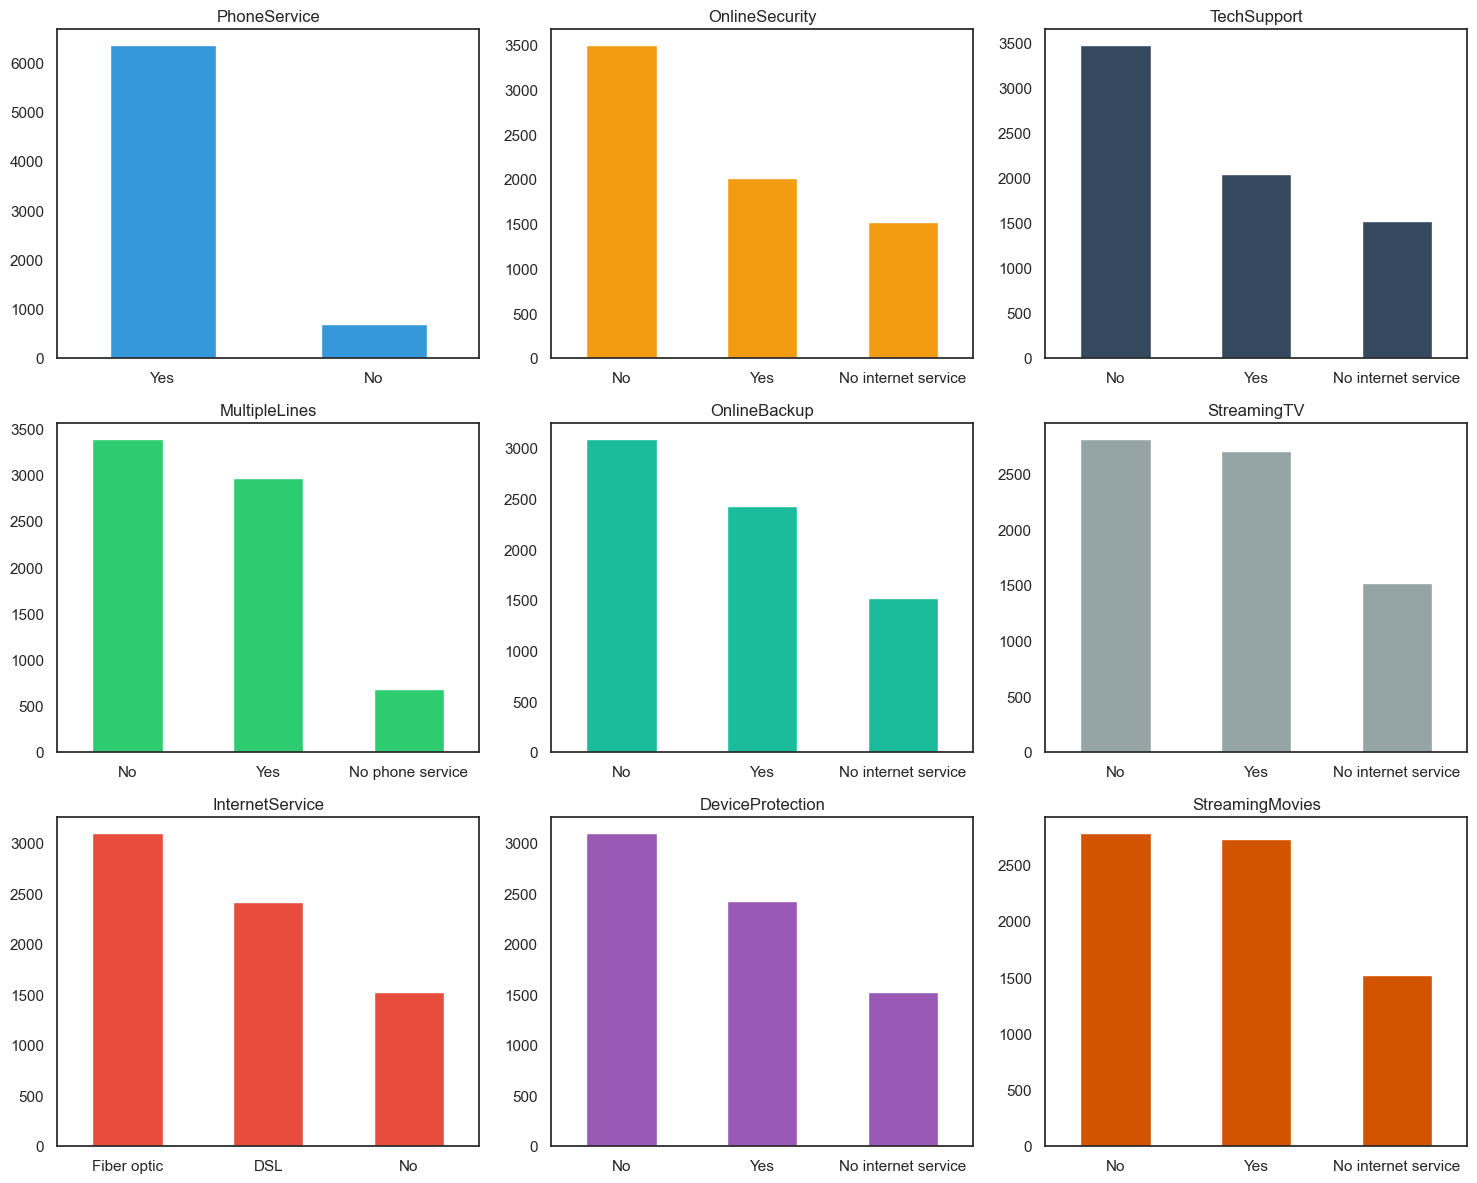

In [86]:
# List of services to be analyzed
services = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
            'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Define different colors for each service
colors = ['#3498db', '#2ecc71', '#e74c3c', '#f39c12', '#1abc9c', '#9b59b6', '#34495e', '#95a5a6', '#d35400']

# Create subplots layout
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))

# Loop through each service and plot bar charts with assigned colors
for i, item in enumerate(services):
    if i < 3:
        ax = telecom_cust[item].value_counts().plot(kind='bar', ax=axes[i, 0], rot=0, color=colors[i])
    elif 3 <= i < 6:
        ax = telecom_cust[item].value_counts().plot(kind='bar', ax=axes[i - 3, 1], rot=0, color=colors[i])
    elif 6 <= i < 9:
        ax = telecom_cust[item].value_counts().plot(kind='bar', ax=axes[i - 6, 2], rot=0, color=colors[i])

    # Set title for each subplot
    ax.set_title(item)

# Adjust layout for better visualization
plt.tight_layout()

# Display the plot
plt.show()


**D. Let's quickly examine the correlation between monthly charges and total charges.**

We will note a positive correlation, where an escalation in the monthly bill for a customer corresponds to an increase in their total charges.

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

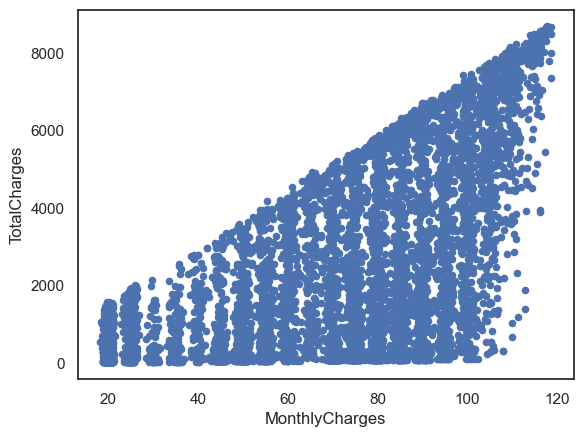

In [89]:
# Create a scatter plot to visualize the relationship between MonthlyCharges and TotalCharges
telecom_cust[['MonthlyCharges', 'TotalCharges']].plot.scatter(x='MonthlyCharges', y='TotalCharges')


**E. Exploring the Interaction of Churn with Key Variables**

Lastly, we'll examine the predictor variable (Churn) and explore how it interacts with other significant variables, as identified in the correlation plot.

1. Lets first look at the churn rate in our data

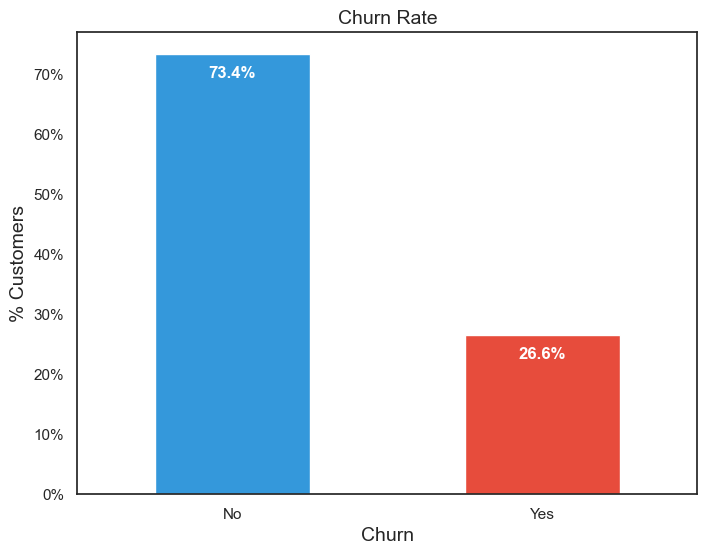

In [95]:
colors = ['#3498db', '#e74c3c']

# Plot the churn distribution
ax = (telecom_cust['Churn'].value_counts() * 100.0 / len(telecom_cust)).plot(kind='bar',
                                                                            stacked=True,
                                                                            rot=0,
                                                                            color=colors,
                                                                            figsize=(8, 6))

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers', size=14)
ax.set_xlabel('Churn', size=14)
ax.set_title('Churn Rate', size=14)

# Create a list to collect the plt.patches data
totals = []

# Find the values and append to the list
for i in ax.patches:
    totals.append(i.get_height())

# Set individual bar labels using the above list
total = sum(totals)

for i in ax.patches:
    # get_x() pulls left or right; get_height() pushes up or down
    ax.text(i.get_x() + i.get_width() / 2, i.get_height() - 4.0,
            f"{round((i.get_height() / total) * 100, 1)}%",  # Corrected to calculate percentages accurately
            fontsize=12,
            color='white',
            weight='bold',
            ha='center')  # Adjusted to center the text within each bar

# Show the plot
plt.show()


Within our dataset, 74% of customers do not churn. It is evident that the data exhibits skewness, which is anticipated, considering a substantial majority of customers are expected to remain. It is crucial to be mindful of this skewness during our modeling phase, as it has the potential to yield a significant number of false negatives. Strategies to address skewness will be explored further in the modeling section.

Now, let's delve into the churn rate across various factors such as tenure, seniority, contract type, monthly charges, and total charges to observe how it varies with these variables.

**i. Churn vs Tenure:** From the plot below, it is evident that customers who do not churn tend to have a longer tenure with the telecom company.

<Axes: xlabel='Churn', ylabel='tenure'>

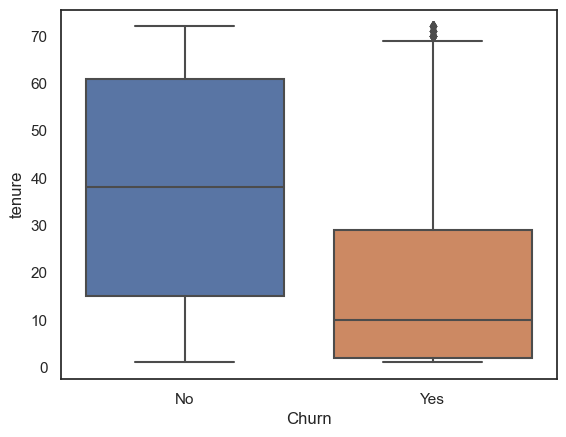

In [96]:
sns.boxplot(x = telecom_cust.Churn, y = telecom_cust.tenure)

**ii. Churn by Contract Type:** Consistent with the observations in the correlation plot, customers with a month-to-month contract exhibit a notably high churn rate.

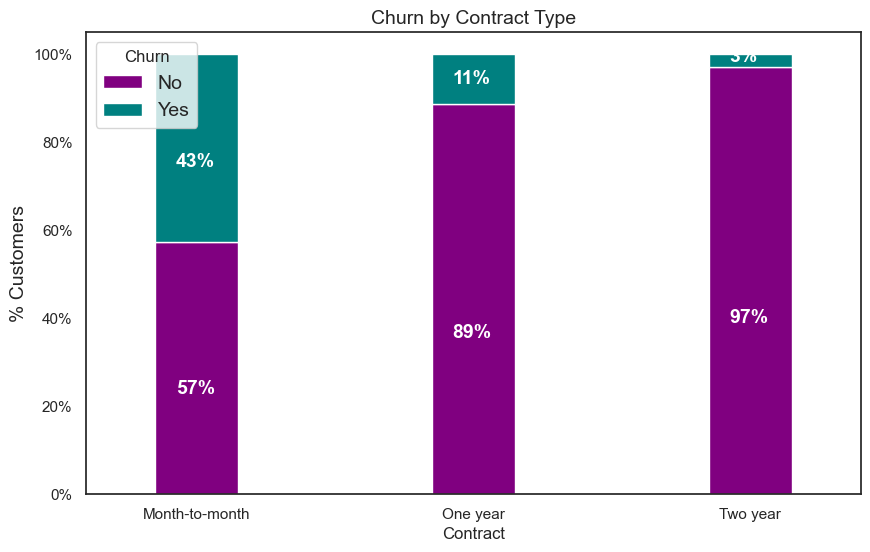

In [102]:
colors = ['#800080', '#008080']  

# Group by Contract and Churn, then unstack for plotting
contract_churn = telecom_cust.groupby(['Contract', 'Churn']).size().unstack()

# Plot the churn distribution by contract type
ax = (contract_churn.T * 100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                width=0.3,
                                                                stacked=True,
                                                                rot=0,
                                                                figsize=(10, 6),
                                                                color=colors)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best', prop={'size': 14}, title='Churn')
ax.set_ylabel('% Customers', size=14)
ax.set_title('Churn by Contract Type', size=14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.0f}%'.format(height), (x + .25 * width, y + .4 * height),
                color='white',
                weight='bold',
                size=14)

# Show the plot
plt.show()

**iii. Churn by Seniority:** The churn rate among senior citizens is nearly twice as high as that among the younger population.

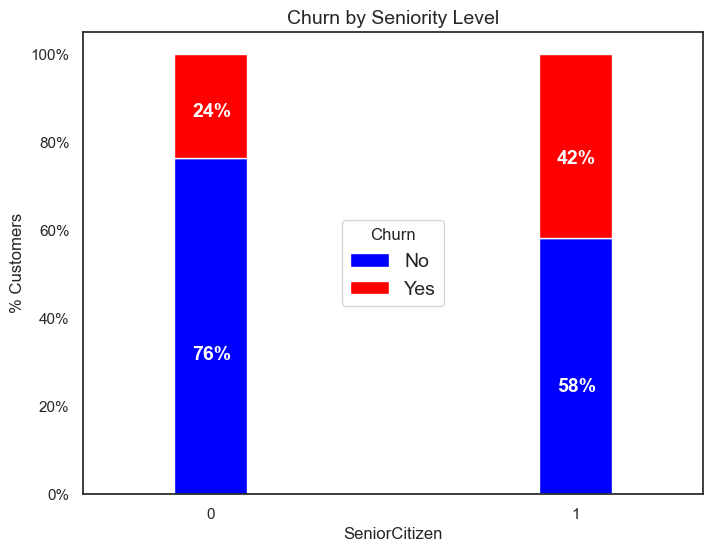

In [108]:
# Define colors for the bar plot
colors = ['#0000FF', '#FF0000']

# Group by SeniorCitizen and Churn, and plot the stacked bar chart
seniority_churn = telecom_cust.groupby(['SeniorCitizen', 'Churn']).size().unstack()
ax = (seniority_churn.T * 100.0 / seniority_churn.T.sum()).T.plot(kind='bar',
                                                                  width=0.2,
                                                                  stacked=True,
                                                                  rot=0,
                                                                  figsize=(8, 6),
                                                                  color=colors)

# Format y-axis as percentage
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Set legend, axis labels, and title
ax.legend(loc='center', prop={'size': 14}, title='Churn')
ax.set_ylabel('% Customers')
ax.set_title('Churn by Seniority Level', size=14)

# Add data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x() + .25 * width, p.get_y() + .4 * height),
                color='white', weight='bold', size=14)


**iv. Churn by Monthly Charges:** A higher percentage of customers tend to churn when faced with elevated monthly charges.

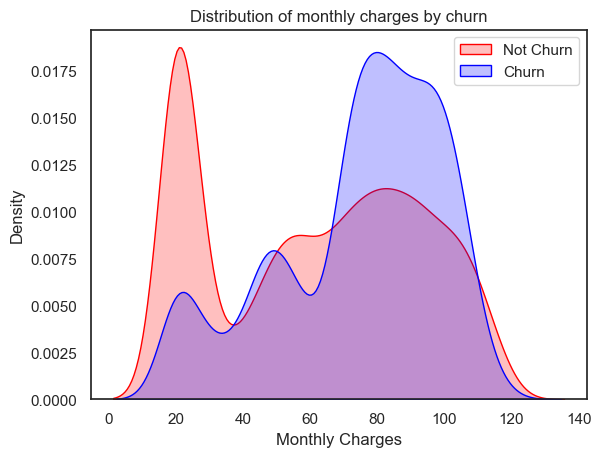

In [107]:
# Create KDE plots for Monthly Charges based on churn status
ax = sns.kdeplot(telecom_cust.MonthlyCharges[(telecom_cust["Churn"] == 'No')],
                 color="Red", fill=True)
ax = sns.kdeplot(telecom_cust.MonthlyCharges[(telecom_cust["Churn"] == 'Yes')],
                 ax=ax, color="Blue", fill=True)

# Set legend and axis labels
ax.legend(["Not Churn", "Churn"], loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')

# Show the plot
plt.show()

**v. Churn by Total Charges:** The data suggests that there is a higher likelihood of churn when the total charges are lower.

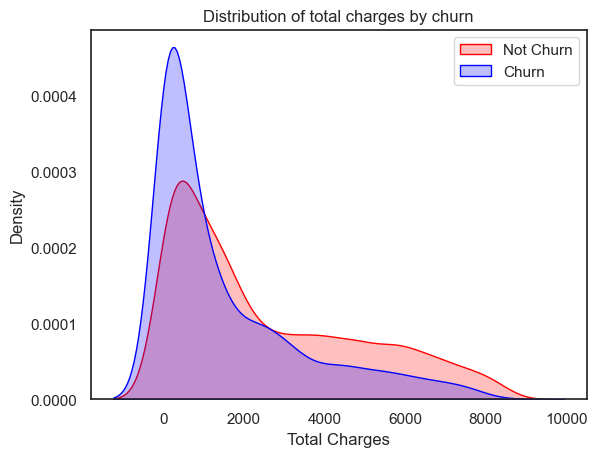

In [111]:
# Kernel Density Plot for Total Charges by Churn
ax = sns.kdeplot(telecom_cust.TotalCharges[(telecom_cust["Churn"] == 'No')],
                 color="Red", fill=True)
ax = sns.kdeplot(telecom_cust.TotalCharges[(telecom_cust["Churn"] == 'Yes')],
                 ax=ax, color="Blue", fill=True)
ax.legend(["Not Churn", "Churn"], loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Total Charges')
ax.set_title('Distribution of total charges by churn')

# Show the plot
plt.show()

<h2 style="line-height:1.3em;">Transition from Exploratory Data Analysis (EDA) to Predictive Modeling: A Comparative Approach</h2>

We will implement the Logistic Regression, Random Forest, SVM, ADA Boost, and XG Boost models.

<h3>1. Logistic Regression</h3>

In [112]:
# using the data frame where we had created dummy variables
y = df_dummies['Churn'].values
X = df_dummies.drop(columns = ['Churn'])

# Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

Scaling the variables in logistic regression to a range of 0 to 1 is crucial for improved accuracy, boosting it from 79.7% to 80.7%. 

Moreover, the variable importance observed aligns with the findings from the Random Forest algorithm and our earlier exploratory data analysis (EDA).

In [113]:
# Create Train & Test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [114]:
# Running logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

In [115]:
from sklearn import metrics
prediction_test = model.predict(X_test)

# Print the prediction accuracy
print (metrics.accuracy_score(y_test, prediction_test))

0.8075829383886256


Axes(0.125,0.11;0.775x0.77)


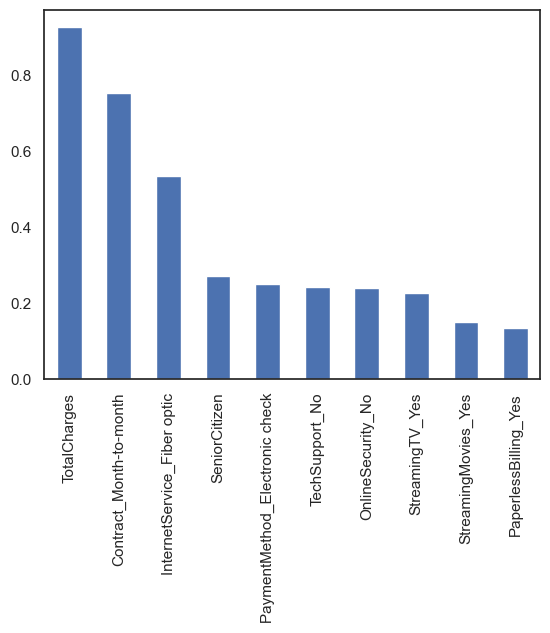

In [121]:
# To get the weights of all the variables
weights = pd.Series(model.coef_[0],
                 index=X.columns.values)

print (weights.sort_values(ascending = False)[:10].plot(kind='bar'))

Axes(0.125,0.11;0.775x0.77)


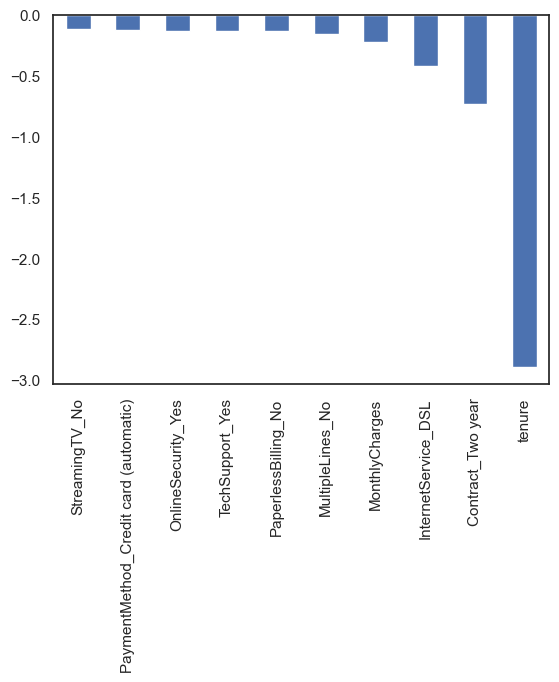

In [123]:
# Print and plot the top 10 weighted features
print(weights.sort_values(ascending=False)[-10:].plot(kind='bar'))

<h3>Observations:</h3>

1. A 2-month contract and longer tenure are associated with a lower likelihood of churn, aligning with our EDA findings.
2. Having DSL internet service is linked to a reduced probability of churn.
3. Conversely, higher total charges, monthly contracts, fiber optic internet services, and being a senior citizen are factors that may lead to higher churn rates.
4. Notably, the presence of fiber optic services, which are known for their faster speeds, appears counterintuitive to increased churn. Further exploration is needed to understand this phenomenon better.
5. Developing hypotheses to explain these patterns would contribute to a more comprehensive understanding of customer churn dynamics.


<h3>2. Random Forest</h3>

In [128]:
from sklearn.ensemble import RandomForestClassifier

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# Create a RandomForestClassifier model with specified parameters
model_rf = RandomForestClassifier(n_estimators=1000, oob_score=True, n_jobs=-1,
                                  random_state=50, max_leaf_nodes=30)



# Fit the model to the training data
model_rf.fit(X_train, y_train)

# Make predictions on the test set
prediction_test = model_rf.predict(X_test)

# Print the accuracy score
print(metrics.accuracy_score(y_test, prediction_test))

0.8095238095238095


<Axes: >

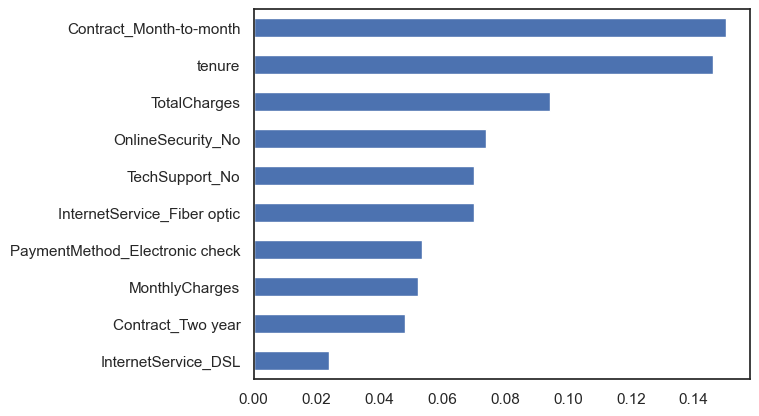

In [130]:
# Get feature importances from the trained Random Forest model
importances = model_rf.feature_importances_

# Create a pandas Series with feature importances and corresponding feature names
weights = pd.Series(importances, index=X.columns.values)

# Plot the top 10 important features
weights.sort_values()[-10:].plot(kind='barh')

<h3>Observations:</h3>

The Random Forest algorithm identifies monthly contract, tenure, and total charges as the most crucial predictor variables for predicting churn. 

These results align closely with those obtained from logistic regression and are consistent with our expectations based on Exploratory Data Analysis (EDA).

<h3>3. Support Vector Machine (SVM)</h3>

In [131]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

In [132]:
# Import Support Vector Machine (SVM) classifier
from sklearn.svm import SVC

# Create an SVM model with a linear kernel
model_svm = SVC(kernel='linear') 

# Fit the SVM model to the training data
model_svm.fit(X_train, y_train)

# Make predictions on the test set
preds = model_svm.predict(X_test)

# Calculate accuracy score
metrics.accuracy_score(y_test, preds)

0.820184790334044

In [133]:
# Create the Confusion matrix
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,preds))  

[[953  89]
 [164 201]]


Using the Support Vector Machine (SVM) model, I achieved an increased accuracy of up to 82%. 

Nevertheless, to gain deeper insights into the model's performance, it is essential to examine the true positive and true negative rates, along with calculating the Area Under the Curve (AUC). 

Further exploration of these metrics will provide a more comprehensive understanding of the predictive capabilities.

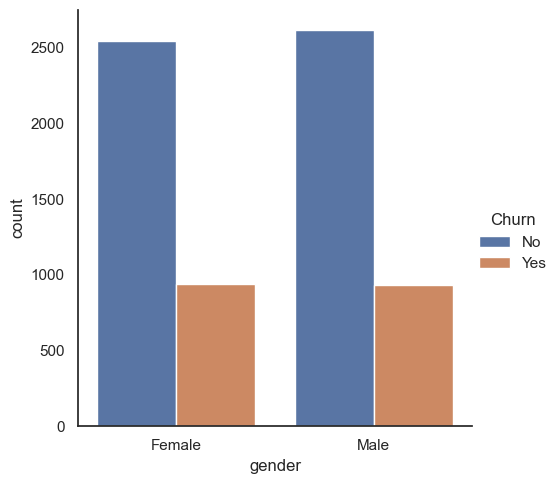

In [136]:
# Create a count plot for Churn based on gender
ax1 = sns.catplot(x="gender", kind="count", hue="Churn", data=telecom_cust,
                  estimator=lambda x: sum(x==0)*100.0/len(x))

<h3>4. ADA Boost</h3>

In [138]:
# AdaBoost Algorithm
from sklearn.ensemble import AdaBoostClassifier

# Create an AdaBoostClassifier model with default parameters
model = AdaBoostClassifier()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
preds = model.predict(X_test)

# Print the accuracy score
metrics.accuracy_score(y_test, preds)

0.8159203980099502

<h3>5. XG Boost</h3>

In [143]:
# XGBoost Algorithm
from xgboost import XGBClassifier

# Create an XGBClassifier model with default parameters
model = XGBClassifier()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
preds = model.predict(X_test)

# Print the accuracy score
metrics.accuracy_score(y_test, preds)

0.8059701492537313

<h1>Conclusion</h1>

In summary, the SVM model demonstrated superior performance, achieving an accuracy of nearly 82% on the test data. This suggests that SVM outperformed other techniques considered in this analysis.